In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm, rcParams
from math import pi
import numpy
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# parameters
nx = 41
ny = 41
xmin = 0
xmax = 1
ymin = -0.5
ymax = 0.5
l2_target = 2e-7

In [8]:
def poisson_IG(nx,ny, xmax,xmin,ymax,ymin):
    dx = (xmax-xmin)/(nx-1)
    dy = (ymax-ymin)/(ny-1)
    
    # mesh
    x = numpy.linspace(xmin,xmax,nx)
    y = numpy.linspace(ymin,ymax,ny)
    X,Y = numpy.meshgrid(x,y)
    
    # source
    L = xmax - xmin
    b = -2*(pi/L)**2*numpy.sin(pi*X/L)*numpy.cos(pi*Y/L)
    
    # Initialize
    p_i = numpy.zeros((nx,ny))
    
    return X,Y, x, y, p_i, b, dx, dy, L

In [4]:
# norm-error function from last lesson:
def L2_error(p,pn):
    return numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))

In [19]:
def poisson_2d(p, b, dx, dt, l2_target):
    l2_norm = 1
    iterations = 0
    l2_conv = []
    
    while l2_norm > l2_target:
        pd = p.copy()
        p[1:-1,1:-1] = 1/(2*(dx**2 + dy**2))*\
                        ((pd[1:-1,2:] + pd[1:-1,:-2])*dy**2 +\
                        (pd[2:,1:-1] + pd[:-2,1:-1])*dx**2 - \
                        b[1:-1,1:-1]*dx**2*dy**2)
        # BCs are autimatically enforced
        l2_norm = L2_error(p,pd)
        iterations += 1
        l2_conv.append(l2_norm)
    print("Number of Jacobi iterations: {0:d}".format(iterations))
    return p, l2_conv    

In [20]:
# plot 3d function from lesson 2:
def plot_3D(x,y,p):
    """Creates 3D plot with appropriate limits and viewing angle
    
    Parameters:
    -----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    p: 2D array of float
        calculated potential field
    
    """
    fig = pyplot.figure(figsize=(11,7),dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
                            linewidth=0, antialiased=False)
    
    ax.set_xlim(0,1)
    ax.set_ylim(-0.61,0.61)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

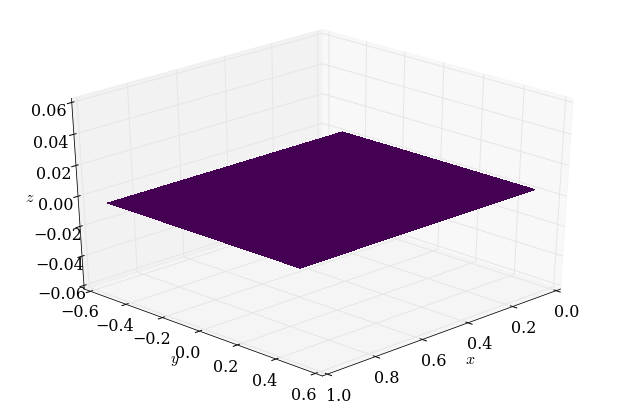

In [17]:
X, Y, x, y, p_i, b, dx, dy, L = poisson_IG(nx, ny, xmax, xmin, ymax, ymin)
plot_3D(x,y,p_i)

In [21]:
p, l2_conv = poisson_2d(p_i.copy(), b, dx, dy, l2_target)

Number of Jacobi iterations: 3125


D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


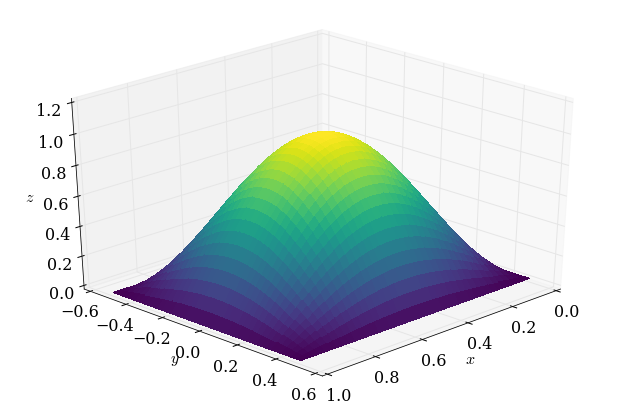

In [23]:
plot_3D(x,y,p)

In [24]:
def p_analytical(X,Y,L):
    return numpy.sin(X*pi/L)*numpy.cos(Y*pi/L)

In [25]:
p_an = p_analytical(X,Y,L)

In [26]:
error = L2_error(p,p_an)
error

0.00044962635353596657

### Algebraic convergence:

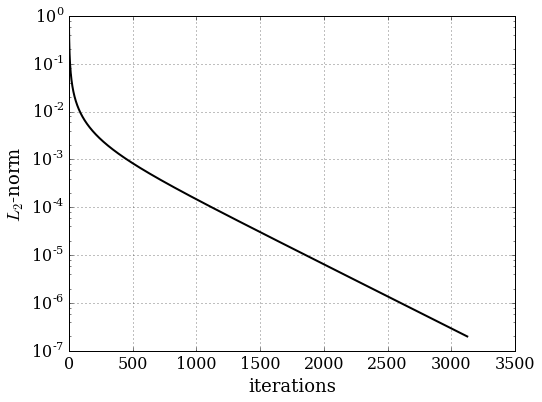

In [29]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'$L_2$-norm', fontsize=18)
pyplot.semilogy(numpy.arange(len(l2_conv)), l2_conv, lw=2, color='k')

### Spatial convergence

In [31]:
nx_values = [11,21,41,81]

error = numpy.zeros_like(nx_values, dtype=numpy.float)

for i, nx in enumerate(nx_values):
    
    ny = nx
    
    X,Y,c,y,p_i,b,dx,dy,L = poisson_IG(nx,ny,xmax,xmin,ymax,ymin)
    p, l2_conv = poisson_2d(p_i.copy(), b, dx, dy, l2_target)
    
    p_an = p_analytical(X,Y,L)
    
    error[i] = L2_error(p, p_an)

D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


Number of Jacobi iterations: 249
Number of Jacobi iterations: 892
Number of Jacobi iterations: 3125
Number of Jacobi iterations: 10708


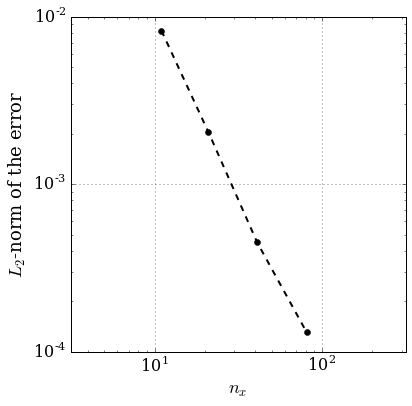

In [32]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o')
pyplot.axis('equal');